# <center>Demo on Hashing</center> 

## Import libraries and Load data

In [20]:
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [21]:
# Reading multiple images from a folder and storing it in a list.
folder = "./YALE"
images = []
for file in os.listdir(folder):
    img = mpimg.imread(os.path.join(folder, file))
    if img is not None:
        images.append(img)

In [22]:
# Vectorizing the images and storing it in a list
image_vector = []
for image in images:
    row,col = image.shape
    img_vec = image.reshape(row*col)
    img_vec_norm = img_vec / np.linalg.norm(img_vec)  # Converting the image vector to a unit vector
    image_vector.append(img_vec_norm)

# Locality Sensitive Hashing – Random Projections

In [23]:
def genRandomHashVectors(m, length):  # Generate random unit vectors for Hashing
    hash_vector = []
    for i in range(m):
        v = np.random.uniform(-1,1,length)
        vcap = v / np.linalg.norm(v)
        hash_vector.append(vcap)
    return hash_vector    

In [24]:
def localSensitiveHashing(hash_vector,data): 
    hash_code = []
    for i in range(len(hash_vector)):
        if np.dot(data,hash_vector[i]) > 0:
            hash_code.append('1')
        else:
            hash_code.append('0')
    return ''.join(hash_code)   

In [25]:
hash_vector = genRandomHashVectors(20,len(image_vector[0]))
print(localSensitiveHashing(hash_vector,image_vector[0]))

01010011101111101110


In [27]:
# Creating a Image Dictionary using the hash as the keys
image_dict = {}
for i in range(len(image_vector)):
    hash_code = localSensitiveHashing(hash_vector,image_vector[i])
    if hash_code not in image_dict.keys():
        image_dict[hash_code] = [i]
    else:
        image_dict[hash_code].append(i)     

In [28]:
# Getting the keys and values of the Dictionary
keys = list(image_dict.keys())
values = list(image_dict.values())

In [29]:
print(image_dict)

{'01010011101111101110': [0, 4, 147], '01110010101111101110': [1, 35, 128], '01110011101111101110': [2, 9], '01010011101001101110': [3], '01010010101111101110': [5, 7, 8, 63, 88, 102, 124, 135], '01110111101111101100': [6, 149], '01010010100111101110': [10, 57], '01010011101111111110': [11], '01010110101111111110': [12, 13, 15, 16, 18, 20, 21, 45, 51, 52, 66, 67, 68, 90, 92, 93, 122], '01010010101101101110': [14, 47, 117, 120, 146], '01110011100111101100': [17, 39], '01010010101111111111': [19], '01010110101101101101': [22], '01010111101111101101': [23, 72], '01010110101111101110': [24, 29, 30, 33, 34, 87, 89, 98, 131], '01010011101101101111': [25], '01010010101111101100': [26, 27], '01110111101111101101': [28], '01010010101110111100': [31], '01010110101101101111': [32], '01010010101110101110': [36, 108, 115], '01110110101111101110': [37, 38, 40, 41, 42, 43, 81, 84, 85, 96], '01010110101110111110': [44], '01110010101111111110': [46, 48, 49, 53, 54], '01110011101110101100': [50, 94], '0

In [30]:
# Plotting images with same hash code
def plotImages(images, img_indices):
    imgs = [images[i] for i in range(len(images)) if i in img_indices]
    fig = plt.figure()
    rows = 2
    n_images = len(imgs)
    for n,image in zip(range(n_images),imgs):
        ax = fig.add_subplot(rows, np.ceil(n_images/float(cols)), n + 1)
        plt.gray()
        plt.imshow(image)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

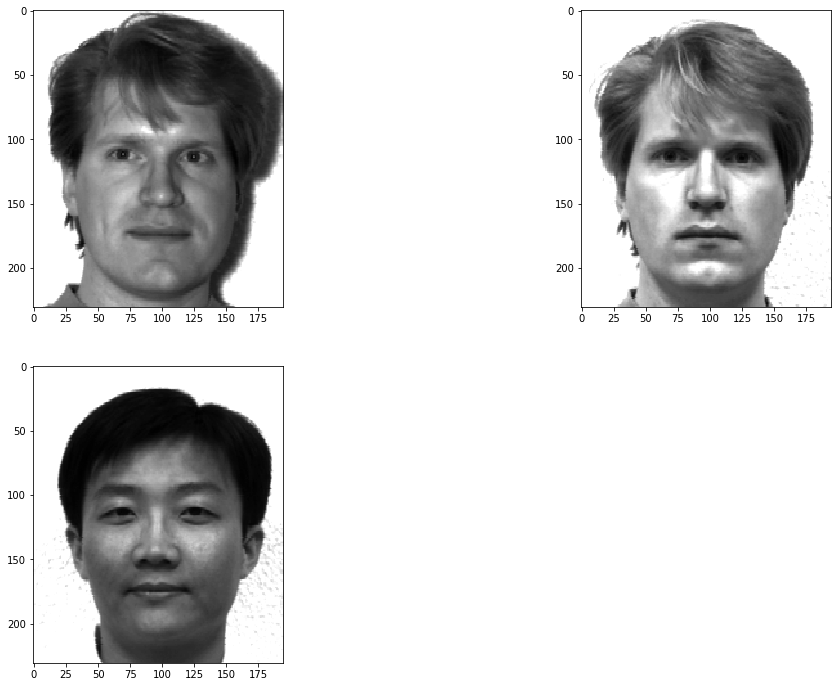

In [31]:
plotImages(images, values[0])

---
# Hashing with Hierarchical Structures

In [32]:
# Class for Defining Node of a Tree
class Node:
    def __init__(self):
        self.m_NodeIndex = -1
        self.m_NodeDepth = -1
        self.m_ParentIndex = -1
        self.m_LeftChildIndex = -1
        self.m_RightChildIndex = -1
        self.m_IsDecisionNode = None
        self.m_HashVector = None
        
    def setNode(self,nodeIndex,nodeDepth,parentIndex):
        self.m_NodeIndex = nodeIndex
        self.m_NodeDepth = nodeDepth
        self.m_ParentIndex = parentIndex

In [33]:
class HashTree:
    def __init__(self,bits):
        self.m_Depth = bits
        self.m_CurrentNodeNum = 0
        self.m_NodeArray = [Node() for _ in range(2**(bits+1)-1)]
    
    def genHashVectors(self,dataLength):
        self.m_NodeArray[0].setNode(0,0,-1)   #Root Node
        self.m_CurrentNodeNum += 1
        
        for nodeCount in range(len(self.m_NodeArray)):
            
            if (self.m_NodeArray[nodeCount].m_NodeIndex == nodeCount and 
                self.m_NodeArray[nodeCount].m_LeftChildIndex == -1 and 
                self.m_NodeArray[nodeCount].m_RightChildIndex == -1 and 
                self.m_NodeArray[nodeCount].m_NodeDepth >= 0):
                
                if self.m_NodeArray[nodeCount].m_NodeDepth != self.m_Depth:
                    self.m_NodeArray[nodeCount].m_IsDecisionNode = True
                    randomVector = np.random.uniform(-1,1,dataLength)
                    self.m_NodeArray[nodeCount].m_HashVector = randomVector / np.linalg.norm(randomVector)
                    
                    lci = self.m_CurrentNodeNum
                    rci = self.m_CurrentNodeNum + 1
                    
                    self.m_NodeArray[nodeCount].m_LeftChildIndex = lci 
                    self.m_NodeArray[nodeCount].m_RightChildIndex = rci 

                    self.m_NodeArray[lci].setNode(lci,self.m_NodeArray[nodeCount].m_NodeDepth+1,
                            self.m_NodeArray[nodeCount].m_NodeIndex)

                    self.m_NodeArray[rci].setNode(rci,self.m_NodeArray[nodeCount].m_NodeDepth+1,
                            self.m_NodeArray[nodeCount].m_NodeIndex)
                    
                    self.m_CurrentNodeNum += 2
                else:
                    self.m_NodeArray[nodeCount].m_IsDecisionNode = False
            else:
                print("Hash Tree Created!!!!!!!!!!!")
                break
    
    def getHashCode(self,data):
        hash_code = []
        nodeCount = 0
        while nodeCount < len(self.m_NodeArray):
            if self.m_NodeArray[nodeCount].m_IsDecisionNode == True:
        
                if np.dot(data,self.m_NodeArray[nodeCount].m_HashVector) > 0:
                    hash_code.append('1')
                    nodeCount = self.m_NodeArray[nodeCount].m_RightChildIndex
                else:
                    hash_code.append('0')
                    nodeCount = self.m_NodeArray[nodeCount].m_LeftChildIndex
            else:
                break
                    
        str_hash_code = ''.join(hash_code)
        return str_hash_code

In [39]:
hash_tree = HashTree(10)
hash_tree.genHashVectors(len(image_vector[0]))

In [40]:
image_dict = {}
for i in range(len(image_vector)):
    hash_code = hash_tree.getHashCode(image_vector[i])
    if hash_code not in image_dict.keys():
        image_dict[hash_code] = [i]
    else:
        image_dict[hash_code].append(i)

In [41]:
keys = list(image_dict.keys())
values = list(image_dict.values())

In [42]:
print(image_dict)

{'0011000111': [0, 5, 8, 22, 23, 24, 26, 27, 29, 30, 31, 32, 34, 36, 42, 47, 56, 58, 59, 60, 62, 63, 65, 77, 78, 79, 82, 84, 85, 87, 98, 99, 100, 119, 121, 125, 126, 146, 162], '0011000110': [1, 2, 4, 7, 9, 10, 12, 13, 15, 16, 18, 19, 20, 21, 33, 35, 37, 38, 40, 41, 43, 46, 51, 52, 55, 57, 61, 64, 66, 68, 70, 71, 73, 74, 75, 76, 81, 83, 86, 95, 101, 103, 104, 105, 106, 107, 108, 109, 111, 114, 115, 117, 118, 122, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 139, 141, 142, 143, 144, 145, 147, 148, 150, 151, 152, 153, 155, 156, 158, 159, 161, 163, 164], '0011000100': [3, 11, 14, 25, 69, 80, 102, 132, 140, 157], '0011001000': [6, 17, 39, 44, 48, 50, 53, 67, 72, 89, 96, 154], '1000011000': [28], '0011001001': [45, 49, 54, 88, 90, 92, 93, 94, 97, 123], '0011010111': [91, 124], '1000000100': [110, 116], '1000000111': [112], '0011010101': [113], '0110011011': [120], '0011001011': [138], '0011001010': [149, 160]}


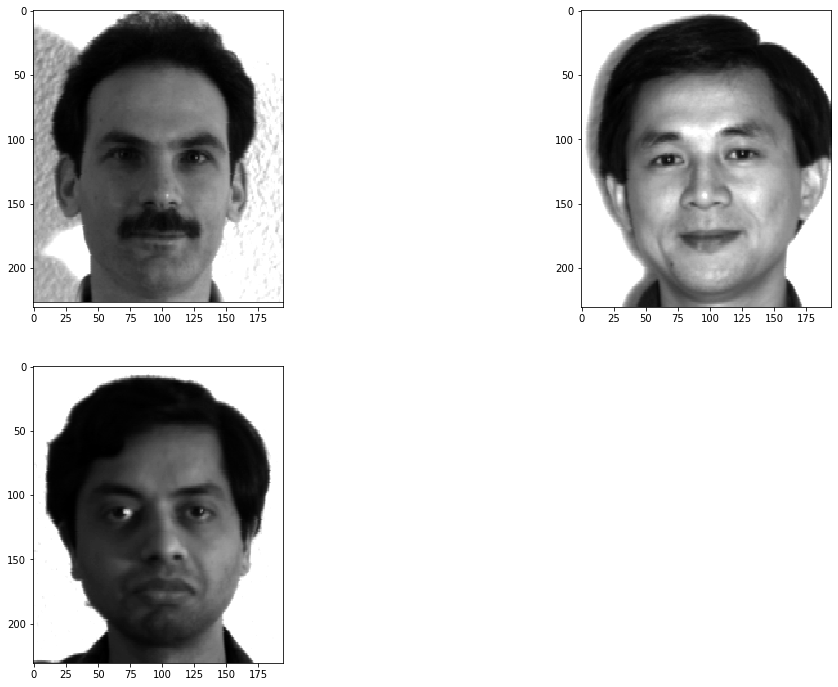

In [38]:
plotImages(images,image_dict['11110010'])